In [1]:
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(rhdf5)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package 

In [2]:
metadata <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/RNA_analysis/s1014_metadata_X_noM_noXistneg.csv")
cellnames <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0615_version2/HiC_analysis/radius_of_gyration/cellname_rmsd_pass.csv") %>% rename(cellname = `0`) %>% filter(cellname != "d4A8") %>% pull(cellname)

New names:
• `` -> `...1`
Rows: 904 Columns: 18
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ...1, orig.ident, sample2, sample3, cellcycle_threshold, day, cell...
dbl (11): nCount_RNA, nFeature_RNA, nCount_SCT, nFeature_SCT, SCT_snn_res.1....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 238 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [3]:
mean_Cast_X <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0615_version2/HiC_analysis/intermingle/intermingle_score_chrX_Cast.csv") %>% select(-"...1") %>% mutate(allele = "Cast")
mean_B6_X <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0615_version2/HiC_analysis/intermingle/intermingle_score_chrX_B6.csv") %>% select(-"...1") %>% mutate(allele = "B6")

New names:
• `` -> `...1`
Rows: 237 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): cellname, day
dbl (3): ...1, mean_index, plot_cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 237 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): cellname, day
dbl (3): ...1, mean_ind

In [4]:
mean_all <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0615_version2/HiC_analysis/intermingle/mean_intermingle_score_all_chrom.csv") %>% select(-"...1")

New names:
• `` -> `...1`
Rows: 237 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): cellname, day
dbl (3): ...1, mean_index, plot_cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(mean_all)

mean_index,cellname,plot_cluster,day
<dbl>,<chr>,<dbl>,<chr>
0.4536505,d0A1,0,d0
0.5413406,d0A14,0,d0
0.5336289,d0A16,0,d0
0.4186611,d0A17,0,d0
0.3872380,d0A2,0,d0
0.4184270,d0A21,0,d0


In [6]:
mean_Cast_X %>% rename(cast = mean_index) %>% select(-allele) %>% left_join(mean_B6_X)  %>% 
    filter(cast > 0.5) %>% filter(mean_index > 0.5)

Joining with `by = join_by(cellname, plot_cluster, day)`


cast,cellname,plot_cluster,day,mean_index,allele
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
0.5306982,d0A1,0,d0,0.5454264,B6
0.7292415,d2A7,2,d2,0.5925679,B6
0.5032665,d4A23,5,d4,0.5617020,B6
0.6062251,d4B82,3,d4,1.2081848,B6
0.8708002,d4B86,5,d4,0.5130304,B6


Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”


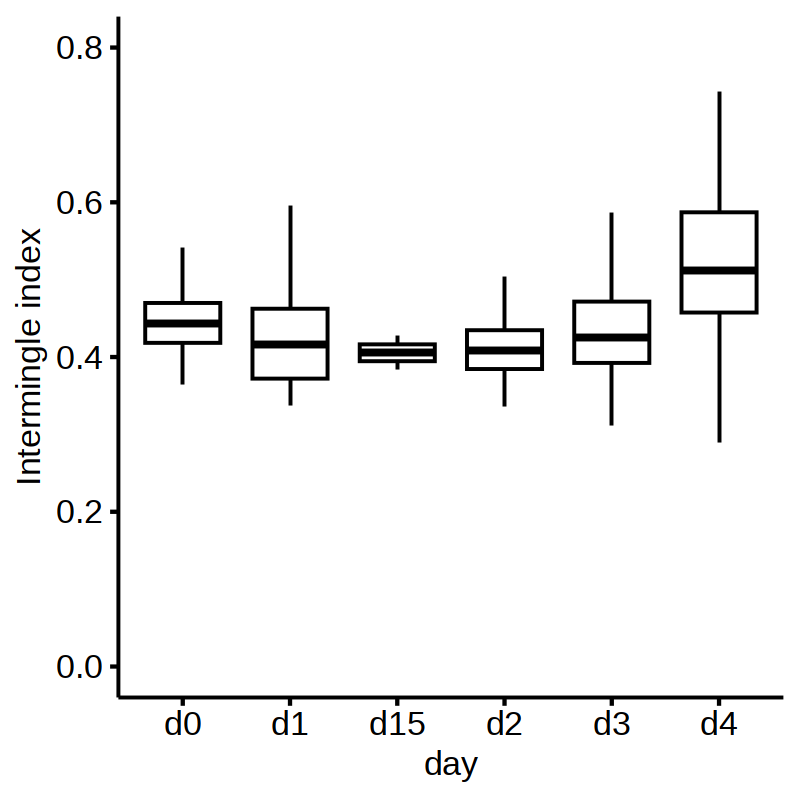

In [7]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
mean_all %>% mutate(day = factor(day, levels = c("d0","d1","d15","d2","d3","d4"))) %>%
    ggboxplot("day", "mean_index", outlier.shape = NA) +ylim(0,0.8) + xlab("day") + ylab("Intermingle index")

Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_signif()`).”


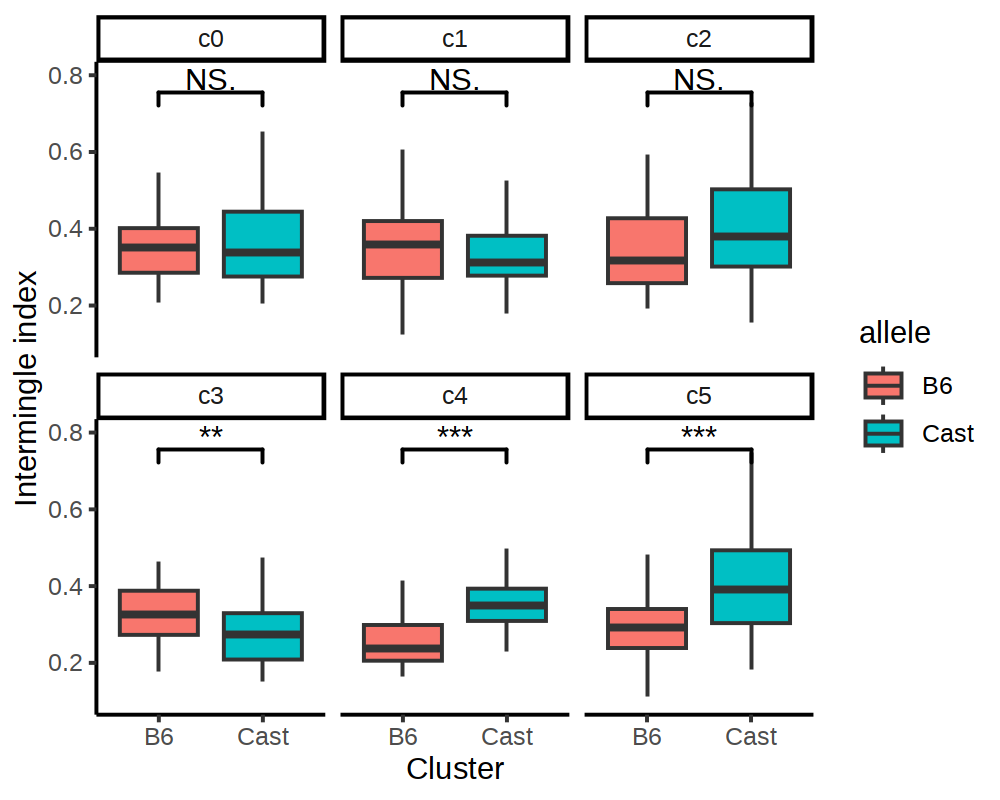

In [9]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)
mean_Cast_X %>% rbind(mean_B6_X) %>% 
    mutate(plot_cluster = paste0("c",plot_cluster)) %>% 
    ggplot(aes(x = allele, y = mean_index)) +
    geom_boxplot(aes(fill = allele), outlier.shape = NA) +
    geom_signif(comparisons = list(c("B6", "Cast")), y_position = c(0.7), map_signif_level = TRUE) + facet_wrap(~plot_cluster)  + xlab("Cluster") + ylab("Intermingle index") + theme_classic() + ylim(0.1,0.8)

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


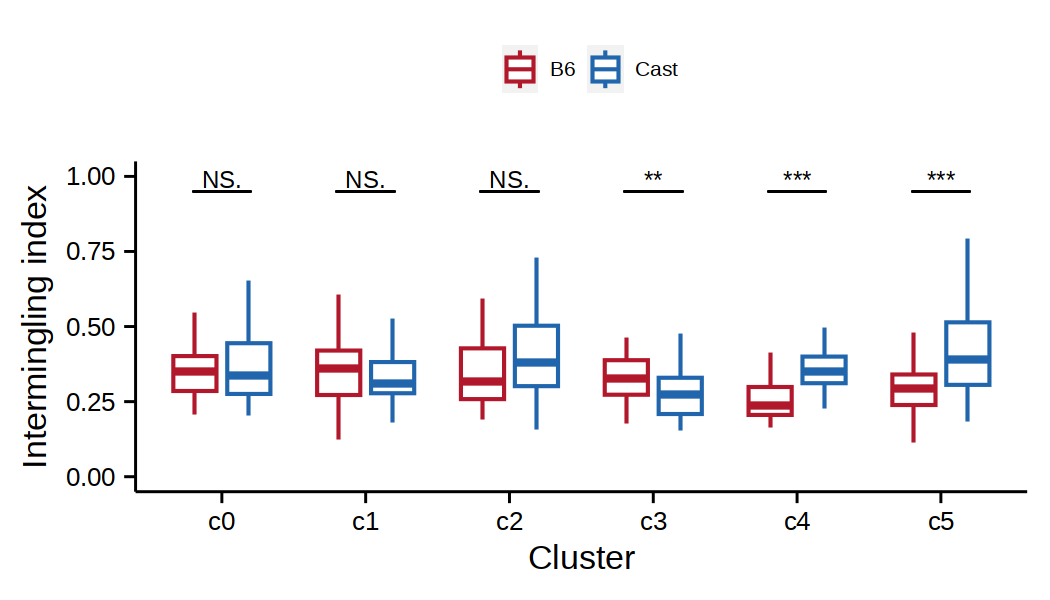

In [10]:
options(repr.plot.width=3.5, repr.plot.height=2, repr.plot.res = 300)
p <- mean_Cast_X %>% rbind(mean_B6_X) %>% 
    mutate(plot_cluster = paste0("c",plot_cluster)) %>% 
    ggplot(aes(x = plot_cluster, y = mean_index, color = allele)) + 
    geom_boxplot(outlier.shape = NA, width = 0.6, linewidth = 0.35, position = position_dodge(0.75)) + 
    # geom_point(position = position_jitterdodge(0.2), alpha=0.5, size = 0.5) +
    xlab("Cluster") + ylab("Intermingling index") + scale_color_manual(values = c("#b2182b","#2166ac"), name = "") + 
    theme(legend.position = "top",
      text = element_text(family="Arial", size=6),
      panel.border = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      axis.line = element_line(color="black", linewidth = 0.25),
      axis.ticks = element_line(color="black", linewidth = 0.25),
      axis.text = element_text(color="black",size=6),
      legend.key = element_rect(colour = NA),
      legend.key.width = unit(0.3, "cm"),
      legend.key.height = unit(0.4, "cm"),
      axis.title=element_text(color="black",size=8,face="plain"),
  ) + geom_signif(y_position = c(rep(0.95, 6)), xmin = c(0.8,1.8,2.8,3.8,4.8,5.8), xmax = c(1.2,2.2,3.2,4.2,5.2,6.2),
                tip_length = 0, 
                annotation = c("NS.","NS.","NS.","**","***","***"),size = 0.25, color = 'black', textsize = 2) + ylim(0,1)

p

ggsave("/share/Data/hxie/project/202209/esc_xwliu/figures_0827/fig2/fig2C_intermingling_index.svg", width = 3.5, height = 2, units = "in", dpi = 300)